## Load datasets

* We use Food-101 dataset from kaggle:('https://www.kaggle.com/kmader/food41')


1. Load dataset, which is HDF5Matrix format
2. Create a generator that yields specified batch 


In [46]:
from keras.utils.io_utils import HDF5Matrix
import h5py
import os
import numpy as np

In [52]:
dataPath = 'dataset/'
f = h5py.File(os.path.join(dataPath,'food_c101_n10099_r64x64x3.h5'),'r')

print(list(f.keys()))
print('category:', f["category"])
print('category_names:', f["category_names"])
print('images:', f["images"])

print([np.argmax(f["category"][i]) for i in range(len(f["category"]))])

['category', 'category_names', 'images']
category: <HDF5 dataset "category": shape (10099, 101), type "|b1">
category_names: <HDF5 dataset "category_names": shape (101,), type "|S40">
images: <HDF5 dataset "images": shape (10099, 64, 64, 3), type "|u1">
[33, 53, 92, 60, 70, 86, 25, 1, 43, 13, 0, 38, 16, 45, 68, 82, 23, 44, 70, 30, 25, 31, 19, 77, 83, 55, 55, 89, 8, 98, 22, 35, 72, 57, 42, 44, 0, 44, 11, 97, 59, 13, 62, 39, 24, 26, 97, 8, 50, 87, 16, 16, 22, 81, 2, 11, 25, 69, 90, 42, 91, 67, 53, 91, 10, 40, 73, 36, 35, 28, 83, 27, 77, 85, 23, 90, 31, 46, 5, 15, 97, 95, 31, 89, 35, 13, 40, 34, 15, 26, 100, 67, 71, 47, 100, 28, 84, 64, 90, 59, 22, 23, 89, 49, 15, 61, 32, 4, 67, 46, 48, 99, 92, 52, 11, 98, 68, 23, 27, 73, 16, 98, 64, 69, 48, 63, 6, 38, 9, 82, 30, 98, 7, 41, 97, 10, 1, 68, 11, 49, 44, 52, 50, 27, 3, 83, 99, 88, 77, 35, 78, 100, 5, 33, 71, 19, 31, 61, 71, 82, 98, 1, 63, 42, 46, 54, 61, 29, 54, 61, 22, 29, 75, 1, 86, 88, 59, 99, 81, 64, 30, 75, 56, 81, 100, 55, 47, 5, 83, 19

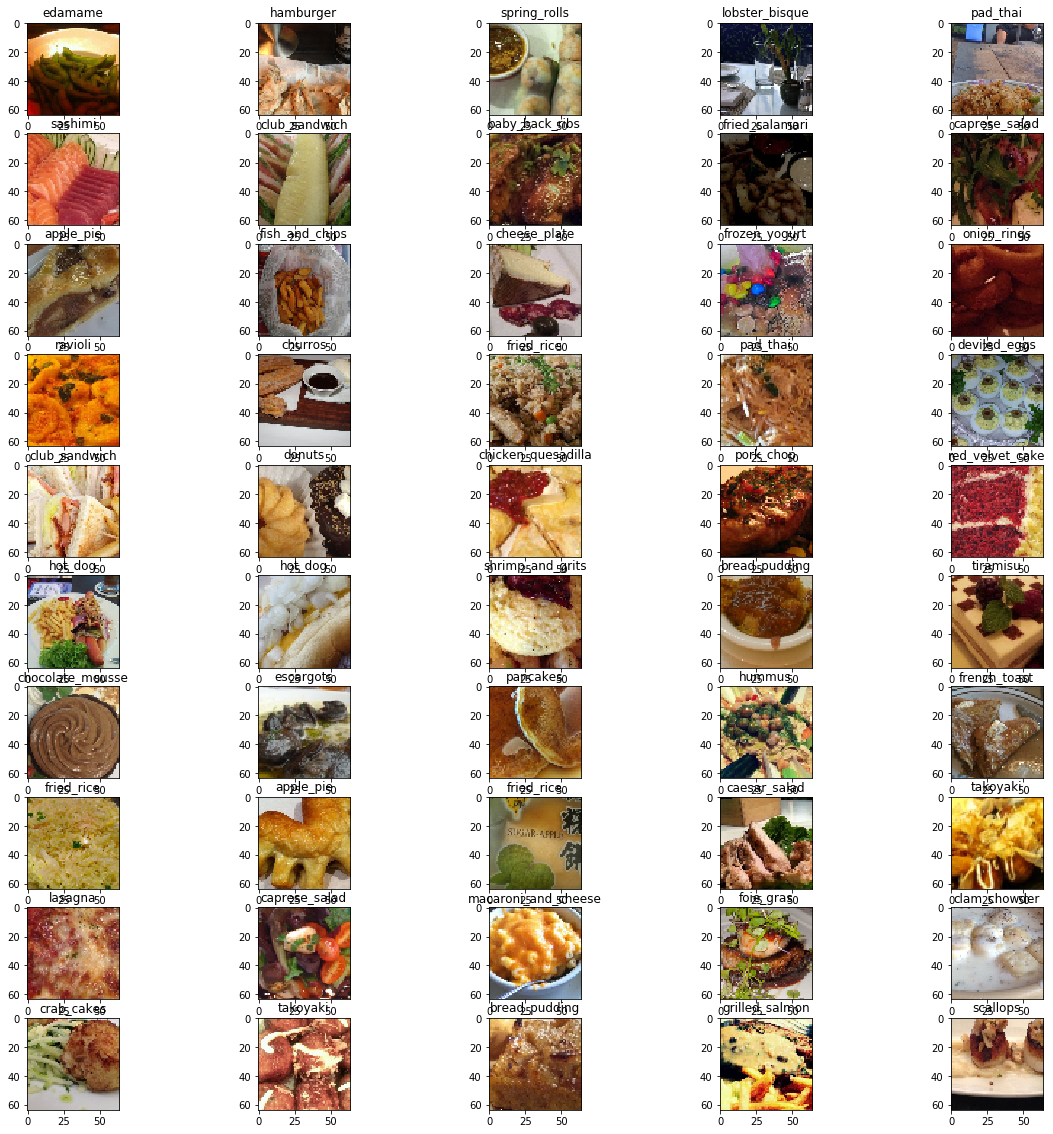

In [45]:
import matplotlib.pyplot as plt
import numpy as np

fig=plt.figure(figsize=(20,20))
n=50
col=5
for i in range(n):
    ax=fig.add_subplot(n/col,col,i+1)
    decoded_category = np.argmax(f["category"][i])
    ax.set_title(f["category_names"][decoded_category].decode())
    ax.imshow(f["images"][i])
plt.show()

## Data preprocessing

* Split dataset into training, validation (8:2)* Normalize data

In [ ]:
# train_h5_path = '/Users/kochiai/Desktop/machine_learning/food_classification/dataset/food_c101_n10099_r64x64x3.h5'
# test_h5_path = '/Users/kochiai/Desktop/machine_learning/food_classification/dataset/food_test_c101_n1000_r64x64x3.h5'
train_h5_path = 'dataset/food_c101_n10099_r64x64x3.h5'
test_h5_path = 'dataset/food_test_c101_n1000_r64x64x3.h5'

num_images = 10099
num_train = int(num_images * 0.8)
num_validation = num_images - num_train
print('number of training data:', num_train)
print('number of validation data:', num_validation)

X_train = HDF5Matrix(train_h5_path, 'images', start=0, end=num_train, normalizer=None)
Y_train = HDF5Matrix(train_h5_path, 'category',  start=0, end=num_train)
print(X_train.shape)
print(Y_train.shape)

X_validation = HDF5Matrix(train_h5_path, 'images', start=num_train, end=None, normalizer=None)
Y_validation = HDF5Matrix(train_h5_path, 'category',  start=num_train, end=None)
print(X_validation.shape)

X_test = HDF5Matrix(test_h5_path, 'images', normalizer=None)
Y_test = HDF5Matrix(test_h5_path, 'category')

## Base accuracy
 
 * Since there are 101 labels, the accuracy of randomly picking a label is 0.99%
 * Try with simple fully connected layers

In [ ]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Flatten(input_shape=(64, 64, 3)))
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(101, activation='softmax'))
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
network.summary()

In [ ]:
history = network.fit(x=X_train,
            y=Y_train, 
            epochs=20, 
            batch_size=32, 
            shuffle="batch", 
            validation_data=(X_validation, Y_validation))

In [ ]:
import matplotlib.pyplot as  plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), 
                       activation='relu', 
                       input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(101, activation='softmax'))


In [ ]:
from keras import optimizers

model.compile(loss='categorical_crossentropy',
optimizer=optimizers.Adam(lr=1e-4),
metrics=['acc'])

In [ ]:
from PIL import Image
history = model.fit(X_train, 
            Y_train, 
            epochs=20, 
            batch_size=128, 
            shuffle="batch", 
            validation_data=(X_validation, Y_validation))

In [ ]:
import matplotlib.pyplot as  plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
from keras import layers
from keras import models
from keras import optimizers
from PIL import Image

# Build new model with Dropout

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), 
                       activation='relu', 
                       input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(101, activation='softmax'))

model.summary()

model.compile(loss='binary_crossentropy',
optimizer=optimizers.Adam(lr=1e-4),
metrics=['acc'])

In [ ]:
from keras import optimizers

model.compile(loss='categorical_crossentropy',
optimizer=optimizers.Adam(lr=1e-4),
metrics=['acc'])

In [ ]:
from PIL import Image
history = model.fit(X_train, 
            Y_train, 
            epochs=50, 
            batch_size=128, 
            shuffle="batch", 
            validation_data=(X_validation, Y_validation))

In [ ]:
import matplotlib.pyplot as  plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## VGG + fine tuning

In [ ]:
from keras.applications import VGG16

"""
weights: specifies the weight checkpoint from which to initialize the mode.
include_top: refers to including (or not) the densely connected classifier on top of the network.
input_shape: the shape of the image tensors
"""
conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(64, 64, 3))

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(101, activation='softmax'))
model.summary()

In [ ]:
conv_base.trainable = True
print(len(conv_base.trainable_weights))

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
   
print(len(conv_base.trainable_weights))

In [ ]:
from keras import optimizers

model.compile(loss='categorical_crossentropy',
optimizer=optimizers.Adam(lr=1e-4),
metrics=['acc'])

In [ ]:
from PIL import Image
history = model.fit(X_train, 
            Y_train, 
            epochs=100, 
            batch_size=128, 
            shuffle="batch", 
            validation_data=(X_validation, Y_validation))

In [ ]:
import matplotlib.pyplot as  plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Image augmentation


In [83]:
from keras.utils.io_utils import HDF5Matrix
import h5py
import os
import numpy as np
dataPath = 'dataset/'
f = h5py.File(os.path.join(dataPath,'food_c101_n10099_r64x64x3.h5'),'r')
print(list(f.keys()))
print('category:', f["category"])
print('category_names:', f["category_names"])
print('images:', f["images"])

['category', 'category_names', 'images']
category: <HDF5 dataset "category": shape (10099, 101), type "|b1">
category_names: <HDF5 dataset "category_names": shape (101,), type "|S40">
images: <HDF5 dataset "images": shape (10099, 64, 64, 3), type "|u1">


In [84]:
x = f["images"]
y = np.array(f["category"], dtype=int)
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [85]:
test_ratio = 0.8
num_test = int(len(x) * test_ratio)
print('num_test', num_test)
x_train = x[0:num_test]
x_validation = x[num_test:]

y_train = y[0:num_test]
y_validation = y[num_test:]

print(x_train.shape)
print(y_train.shape)
print(x_validation.shape)
print(y_validation.shape)

num_test 8079
(8079, 64, 64, 3)
(8079, 101)
(2020, 64, 64, 3)
(2020, 101)


In [86]:
batch_size=256
keep_prob = 0.5

In [96]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=180,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.3,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
#train_datagen.fit(x_train)

train_generator = train_datagen.flow(x=x_train, 
                                     y=y_train,
                                     shuffle=True,
                                     batch_size=batch_size)

test_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = test_datagen.flow(x=x_validation,
                                         y=y_validation,
                                         save_format=None,
                                         shuffle=True,
                                         batch_size=batch_size)

(1, 64, 64, 3)


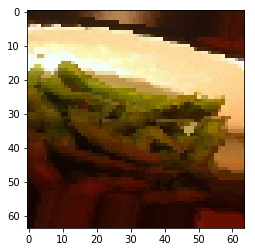

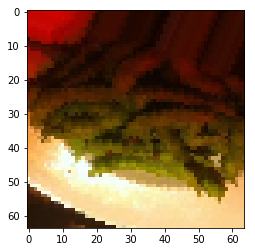

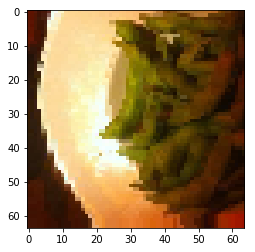

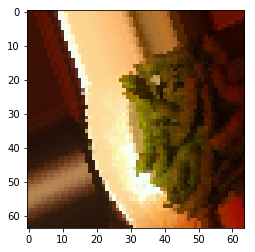

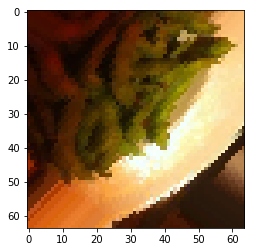

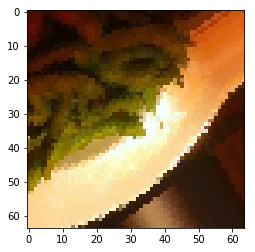

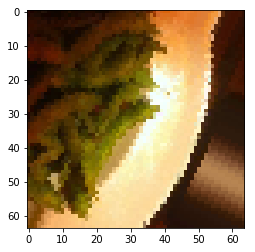

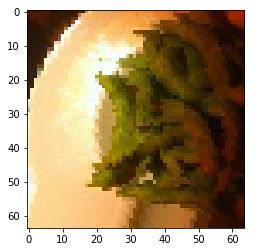

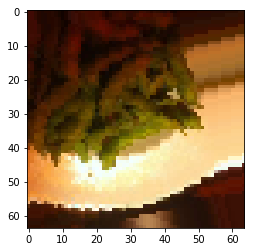

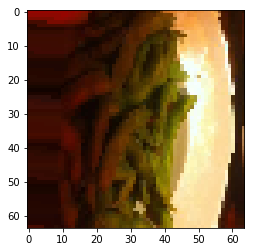

In [97]:
from keras.preprocessing import image
import matplotlib.pyplot as plt

x_ = x_train[0:1]
print(x_.shape)
i = 0
for batch in train_datagen.flow(x_, batch_size=1):
    plt.figure(i)
    imgplot=plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 10 == 0:
        break
plt.show()

In [98]:
from keras.applications import VGG16
from keras.applications import inception_v3

"""
weights: specifies the weight checkpoint from which to initialize the mode.
include_top: refers to including (or not) the densely connected classifier on top of the network.
input_shape: the shape of the image tensors
"""
conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(64, 64, 3))
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0         
__________

In [83]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dropout(1-keep_prob))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(101, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 2, 2, 512)         14714688  
_________________________________________________________________
flatten_10 (Flatten)         (None, 2048)              0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 2048)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 64)                131136    
_________________________________________________________________
dense_20 (Dense)             (None, 101)               6565      
Total params: 14,852,389
Trainable params: 7,217,125
Non-trainable params: 7,635,264
_________________________________________________________________


In [84]:
conv_base.trainable = True
print(len(conv_base.trainable_weights))

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
   
print(len(conv_base.trainable_weights))

6
6


In [80]:
from keras import optimizers

model.compile(loss='categorical_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-3),
metrics=['acc'])

In [81]:
training_set_size=8079
step_per_epoch = training_set_size // batch_size
print(step_per_epoch)

validation_set_size = 1020
validation_steps = validation_set_size // batch_size
print(validation_steps)

31
3


In [82]:
from PIL import Image
history = model.fit_generator(train_generator,
                             steps_per_epoch=step_per_epoch+1,
                             epochs=100,
                             validation_data=validation_generator,
                             validation_steps=validation_steps+1)

Epoch 1/100
32/32 [==============================] - 34s 1s/step - loss: 4.8154 - acc: 0.0119 - val_loss: 4.5685 - val_acc: 0.0176

KeyboardInterrupt: 

## Use higher resolution images and Inception V3

In [1]:
from keras.utils.io_utils import HDF5Matrix
import h5py
import os
import numpy as np
dataPath = 'dataset/'
f = h5py.File(os.path.join(dataPath,'food_c101_n1000_r384x384x3.h5'),'r')
print(list(f.keys()))
print('category:', f["category"])
print('category_names:', f["category_names"])
print('images:', f["images"])

/Users/kochiai/anaconda/envs/dl36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


['category', 'category_names', 'images']
category: <HDF5 dataset "category": shape (1000, 101), type "|b1">
category_names: <HDF5 dataset "category_names": shape (101,), type "|S40">
images: <HDF5 dataset "images": shape (1000, 384, 384, 3), type "|u1">


In [2]:
x = f["images"]
y = np.array(f["category"], dtype=int)
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [3]:
test_ratio = 0.8
num_test = int(len(x) * test_ratio)
print('num_test', num_test)
x_train = x[0:num_test]
x_validation = x[num_test:]

y_train = y[0:num_test]
y_validation = y[num_test:]

print(x_train.shape)
print(y_train.shape)
print(x_validation.shape)
print(y_validation.shape)

num_test 800
(800, 384, 384, 3)
(800, 101)
(200, 384, 384, 3)
(200, 101)


In [19]:
batch_size = 32

In [20]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            fill_mode='nearest')
train_datagen.fit(x_train)

train_generator = train_datagen.flow(x=x_train, 
                                     y=y_train,
                                     shuffle=True,
                                     batch_size=batch_size)

test_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = test_datagen.flow(x=x_validation,
                                         y=y_validation,
                                         save_format=None,
                                         shuffle=True,
                                         batch_size=batch_size)

(4, 384, 384, 3)


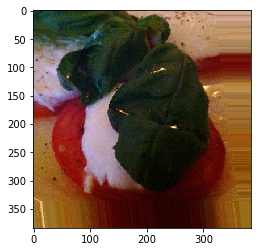

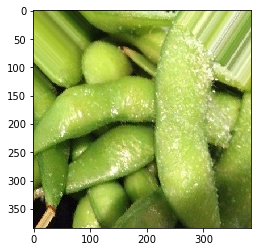

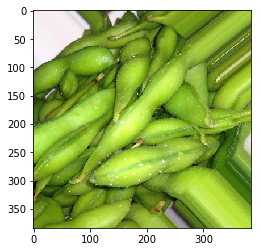

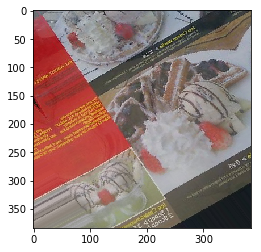

In [21]:
from keras.preprocessing import image
import matplotlib.pyplot as plt

x_ = x_train[0:4]
print(x_.shape)
i = 0
for batch in train_datagen.flow(x_, batch_size=1):
    plt.figure(i)
    imgplot=plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [22]:
from keras.applications import inception_v3

"""
weights: specifies the weight checkpoint from which to initialize the mode.
include_top: refers to including (or not) the densely connected classifier on top of the network.
input_shape: the shape of the image tensors
"""
conv_base = inception_v3.InceptionV3(weights='imagenet',
                 include_top=False,
                 input_shape=(384, 384, 3))
conv_base.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 384, 384, 3)  0                                            
__________________________________________________________________________________________________
conv2d_283 (Conv2D)             (None, 191, 191, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_283 (BatchN (None, 191, 191, 32) 96          conv2d_283[0][0]                 
__________________________________________________________________________________________________
activation_283 (Activation)     (None, 191, 191, 32) 0           batch_normalization_283[0][0]    
__________________________________________________________________________________________________
conv2d_284

In [23]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(101, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 10, 10, 2048)      21802784  
_________________________________________________________________
flatten_2 (Flatten)          (None, 204800)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               52429056  
_________________________________________________________________
dense_4 (Dense)              (None, 101)               25957     
Total params: 74,257,797
Trainable params: 74,223,365
Non-trainable params: 34,432
_________________________________________________________________


In [24]:
conv_base.trainable = False
# print(len(conv_base.trainable_weights))

# set_trainable = False
# for layer in conv_base.layers:
#     if layer.name == 'block5_conv1':
#         set_trainable = True
#     if set_trainable:
#         layer.trainable = True
#     else:
#         layer.trainable = False
   
print(len(conv_base.trainable_weights))

0


In [25]:
from keras import optimizers

model.compile(loss='categorical_crossentropy',
optimizer=optimizers.Adam(lr=1e-4),
metrics=['acc'])

In [26]:
from PIL import Image

history = model.fit_generator(train_generator,
                             steps_per_epoch=100,
                             epochs=100,
                             validation_data=validation_generator,
                             validation_steps=50)

Epoch 1/100


KeyboardInterrupt: 